<a href="https://colab.research.google.com/github/laneboi/playground/blob/master/Linear_Regression_Intuition_for_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training of Linear Model

As I am just a beginner in Machine Learning and I have no strong intuition in underlying concepts like operations in linear algebra, it is not an easy task to comprehend the meaning of analytical solutions for linear regression. In the Internet different tutorials on linear algebra can be found, and some of them are "specially designed" for machine learning/data science entrants. The problem I see there is that even after taking one or more of those (as I did), you may still struggle in applying newly learned concepts on the spot to develop some intuition about what's going on underneath the hood. This notebook is how I explained theoretical equations from the 4th chapter of the textbook by Aureilen Geron (my version is in Russian, so don't worry if my translation mismatches the original text). Please do not consider the text below as something 100% right. If you spot a mistake, please, let me know how to correct it. Hope this notebook will be helpful for somebody else too.

## Closer Look at Linear Regression Model

Among known machine learning algorithms, something called linear model regression is one of the simplest (if not the absolutely simplest one). It is easy to express in words how it works: the algorithm is trying to find a straight line (in case of two dimensions, which is the simplest case) such that it fits all the data points the best on average. Let's visualize it!

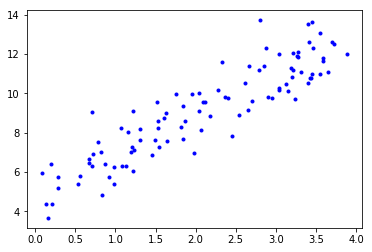

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(21) # Initialize seed in order to make the results reproducable.
X = 4 * np.random.rand(100, 1)
y_ = 5 + 2 * X
y = y_ + np.random.randn(100, 1) # Add some random noise.
plt.plot(X, y, 'b.')
plt.show()

### Linear Function Written in a Linear Algebra Way

As you can find in Google, the algorithm uses some technique called "least squares method" to find the line with the best fit on average. Long story short, it searches for a line such that the sum: \begin{equation}\sum^n_{i=1}(h(x_i)
-y_i)^2\end{equation}
is at its minimum. This just means that we calculate the difference between predicted and actual values for each entity, square it, and then sum them all together. Nothing very special here, if we don't go deeper (and we won't do it here).

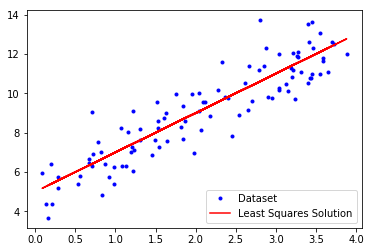

In [0]:
plt.plot(X, y, 'b.', label='Dataset')
plt.plot(X, y_, 'r-', label='Least Squares Solution')
plt.legend(loc='lower right')
plt.show()

Since there is only one such line, there is also an analytical approach (i.e. deriving a formula based on a bunch of theorems) to find the equation for this line. Let's have a look at some equations and try to discover analogies between "common" forms and matrix forms.

In general, the *hypothesis function* (*h(x)* that makes predictions based on *n* features) can be written as follows:
\begin{equation}h(x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta_0+\sum^n_{i=1}{\theta_ix_i}\end{equation}
or in matrix form:
\begin{equation}h(x)=\theta^Tx\end{equation}
Hence,
\begin{equation}\theta^Tx=\theta_0+\sum^n_{i=1}{\theta_ix_i}\end{equation}
***θ*** is a coefficient vector, which is the synonym for list of coefficients. Notice that **x** is also a vector, but one that contains features of a particular entity. For example, it can be a list with age, area, number of rooms and so on of a house. If we use n features in our model, we must have n coefficients to make predictions. Rules for matrix multiplication differ from rules for multiplication of real numbers. To ensure that multiplication is valid, we need to check the shapes of two matrices. Say, an *m × r* matrix can be multiplied only by *r × n* matrices. That's it, to perform matrix multiplication, two inner numbers must be equal! In our case, *θ* and *x* will both be vectors (shape 100 × 1), so we need to transpose *θ*, so that its single column becomes a single row (1 × 100), and we proceed. The dot product of 1 × 100 shape by 100 × 1 shape results in a 1 × 1 solution. This makes sense, because in this example we tried to predict an outcome for only 1 entity with 100 attributes. Hopefully, this equation shines more intuitively clear for you now. Check the code below anyway.

In [0]:
# y = 5 + 2 * x
theta = np.array([5, 2])
x = np.array([1, 2])
print(theta.T.dot(x))

9


In [0]:
# Adding more features: y = 25 + 4 * x1 - 7 * x2 - 16 * x3 + 2 * x4
theta = np.array([25, 4, -7, -16, 2])
x = np.array([1, 13, 2, 0, 1.5])
print(theta.T.dot(x))

66.0


Notice that if the intercept (*θ*[0]) is included in theta as its first value, then *x* must have a 1 on front.

Similar job (with additional operations) is done to find losses of the model. The equation for mean squared error in matrix format looks like this:
\begin{equation}MSE(X, h_\theta)=\frac{1}{m}\sum^m_{i=1}(h(x_i)-y_i)^2=\frac{1}{m}\sum^m_{i=1}(\theta^Tx_i-y_i)^2\end{equation}

And we move on to the next equation.

### Black Magic to Find Coefficients

This equation actually drove me to reflect on equations in matrix form deeper, because previous didn't look like absolutely unclear and was kinda intuitive. But not this one. Ladies and gentlemen, the crazy ***normal equation***. This is a *closed-form solution* (using a bit of fancy math) for linear regression. We can just paste our data in it, perform some calculations and obtain coefficients that minimize losses. Cool, huh!
\begin{equation}\hat{\theta}=(X^TX)^{-1}X^Ty\end{equation}
In order to comprehend this, I decided to look at something similar:
\begin{equation}A=(X^TX)^{-1}X^TX\end{equation}
If you remember the row-column rule for matrix multiplication, we need the inner sizes of two matrices to be equal (m × r and r × n). When we transpose a matrix, its rows and columns are swapped, so `X.T @ X` in terms of sizes can be viewed as `(n × m) @ (m × n) == (n × n)`. 

In [0]:
M = np.array([[1, 2, 3],
              [4, 5, 6]])
M_mult = M.T.dot(M)
print(f'{M.T.shape} x {M.shape} = {M_mult.shape}')

(3, 2) x (2, 3) = (3, 3)


Now we have a special matrix with equal count of rows and columns - a ***square matrix***. I'll tell you later why we care about this. But for now consider the next two steps. First, we raise the dot product to the power of -1, which is equivalent to division of 1 by this product. In the world of linear algebra, it is called the ***inverse*** of a matrix. Second, we multiply the inverse of dot product by the dot product. There's a parallel to real numbers arithmetic. `1 / n * n == 1`, so `(X.T @ X) ** -1 @ (X.T @ X) == 1`? Not quiet. In case of matrices a multiplication like this one results in something called an ***identity matrix***. Identity matrix is an m × m matrix (i.e. a square matrix) with all 1's on its *main diagonal* (from top left to bottom right) and 0's elsewhere.
\begin{equation}I_3=\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}\end{equation}

Back to the normal equation and its little sibling. We can write:
\begin{equation}A=(X^TX)^{-1}X^TX = I_n\end{equation}
\begin{equation}\hat{\theta}=(X^TX)^{-1}X^TX=(X^{-1}A)y=(X^{-1}I_n)y\end{equation}

Which now is the straightforward definition of a coefficient of a linear function. Its interpretation in a real numbers algebra is:
\begin{equation}\hat{\theta}=1\frac{y}{x}=\frac{y}{x}\end{equation}

At this point you may wonder, why we have to perform all these transpositions and matrices dot multiplications, when we could just multiply the inverse of X by y? Well, we couldn't. And the reason is that not every matrix has the inverse. If it has, such matrix is said to be ***invertible***. Otherwise, a matrix is ***singular*** (*noninvertible*).


In [0]:
try:
    np.linalg.inv(M)
except np.linalg.LinAlgError:
    print('Whoops!')

Whoops!


A matrix must satisfy two properties to be invertible:


1.   It must be a square matrix
2.   Its determinant must be a non-zero value

These properties arise from the equation for the inverse of a matrix:
\begin{equation}A^{-1}=(\begin{bmatrix}a & b \\ c & d\end{bmatrix})^{-1}=\frac{1}{det(A)}\begin{bmatrix}d & -b \\ -c & a\end{bmatrix}\end{equation}

The determinant of a 2 × 2 matrix is calculated as follows:
\begin{equation}det(A)=det(\begin{bmatrix}a & b \\ c & d\end{bmatrix})=ad-bc\end{equation}

Here I'm not going to explain the meaning of the determinant. If you want more details, I recommend you to watch a series of videos on [linear algebra](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) by [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/featured) for nice explanations of basic terms of linear algebra and their meanings.

In the reality we almost always deal with non-square matrices, and even if they are square, the determinant may still be undefined.

To summarize, the process of finding coefficients is really straightforward in its core: we just divide *y* by *x*. Due to restrictions introduced by laws of linear algebra, we have to take a detour to guaranteed perform it. When we write it in matrix form, then the really simple idea is expressed in a fancy way (for newbies in linear algebra). So now I hope it doesn't seem fancy for you, as it seemed to me.

One more thing I'd like to discuss here is related to cases with multiple attributes. If we have something like:
\begin{equation}y=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3\end{equation}

then finding corresponding coefficients is essentially equivalent to finding *partial derivatives*. In other word, how much changes *y* with change of a particular attribute (*x1*, *x2*, *x3*). Thus, in case of linear equation, the vector of coefficients is a vector of partial derivatives:
\begin{equation}
\theta = 
\begin{bmatrix}
\theta_1=\frac{\partial}{\partial x_1}y \\
\theta_2=\frac{\partial}{\partial x_2}y \\
\theta_3=\frac{\partial}{\partial x_3}y \\
... \\
\theta_n=\frac{\partial}{\partial x_n}y
\end{bmatrix}
\end{equation}

It makes sense. Coefficients in a linear equation mean how much we need to add when corresponding variable was increased by one.